In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 14.3 MB/s eta 0:00:00


td
L
S5.00 FEE
PER USAGE
FOR NON-MEMBERS
SIGNED HARBOUR SUPERVISOR


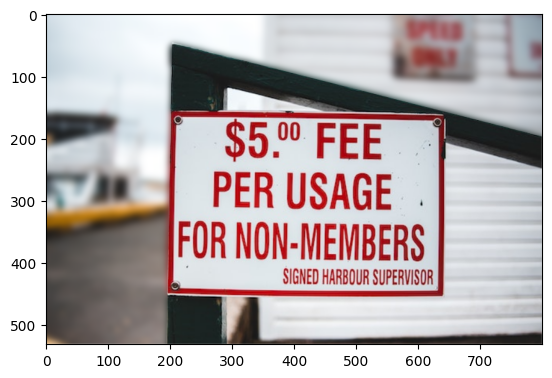

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import h5py  # For saving to .h5 files

# Read image
image_path = '/content/test2.png'
img = cv2.imread(image_path)

# Instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# Detect text on image
text_ = reader.readtext(img)

# Prepare data to save
detected_text = []
for t_, t in enumerate(text_):
    bbox, text, score = t
    detected_text.append({
        'bbox': np.array(bbox, dtype=np.float32),  # convert bbox to numpy array for saving
        'text': text,
        'score': score
    })
    print(text)

# Create an HDF5 file
with h5py.File('handwritten_recognition_model.h5', 'w') as f:
    for i, item in enumerate(detected_text):
        grp = f.create_group(f"text_{i}")
        grp.create_dataset("bbox", data=item['bbox'])
        grp.create_dataset("text", data=np.string_(item['text']))  # convert text to a fixed-length string
        grp.create_dataset("score", data=item['score'])

# Visualize the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
!pip install flask_cors

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import io

app = Flask(handwritten_recognition_model)
CORS(app)

# Load the trained model
model = keras.models.load_model('handwritten_recognition_model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the image from the request
    image_data = request.files['image']

    # Convert the image to a PIL Image object
    image = Image.open(io.BytesIO(image_data.read()))

    # Resize the image to 28x28 pixels
    image = image.resize((28, 28))

    # Convert the image to grayscale
    image = image.convert('L')

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Normalize the image array
    image_array = image_array / 255.0

    # Add a batch dimension to the image array
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions
    output = model.predict(image_array)
    prediction = np.argmax(output[0])

    # Return the prediction
    return jsonify({'prediction': prediction})

@app.route('/upload', methods=['POST'])
def upload():
    # Get the image from the request
    image_data = request.files['image']

    # Save the image to a file
    image_data.save('image.png')

    # Return a success message
    return jsonify({'message': 'Image uploaded successfully'})

if _name_ == '_main_':
    app.run(debug=True)

NameError: name 'handwritten_recognition_model' is not defined